<a href="https://colab.research.google.com/github/emiliomercuri/EnvHydrology2026/blob/main/Aulas/Aula02-Delineamento/Pysheds_exemplo_amazonas_GEO_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delineamento da Bacia Hidrográfica

Nessa aula iremos realizar o delineamento da bacia hidrográfica usando o modelo digital do terreno e iremos calcular a área da bacia.

Para isso precisaremos instalar a biblioteca `pysheds` no colab.


Biblioteca criada por Matt Bartos: Assistant Professor of Civil Engineering at UT Austin/USA. Mais informações sobre a biblioteca `pysheds`:

* https://github.com/mdbartos/pysheds
* https://pypi.org/project/pysheds/


In [1]:
pip install pysheds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.0 MB/s eta 0:00:00


In [2]:
pip install contextily

# Import modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
from shapely import geometry, ops
import fiona
import geopandas as gpd
import contextily as cx

In [5]:
# Cria um diretório para armazenar as imagens
!mkdir img

## Escolhendo a bacia

1. Entrar no site do CABra e escolher uma bacia que tenha 0% de falhas nos dados (https://thecabradataset.shinyapps.io/CABra/)
2. Verificar se nenhum outro grupo pegou essa bacia
3. Verificar se é de um bioma diferente dos anteriores
4. Ver os limites de coordenadas com ajuda do shapefile CABra_boundaries (procedimento descrito a seguir)


In [6]:
# download dos arquivos CABra_boundaries shapefiles
!gdown '1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc'

# cria uma pasta para armazenar os arquivos shapefile
!mkdir shapefiles_CABra

!unzip CABra_boundaries.zip -d shapefiles_CABra

Downloading...
From (original): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc
From (redirected): https://drive.google.com/uc?id=1nR8_kvtnhjZAHeSMkRUFV_59g_SmzZlc&confirm=t&uuid=83ee5e49-8a98-4c6e-b69a-7163101fbd82
To: /content/CABra_boundaries.zip
100% 48.0M/48.0M [00:00<00:00, 96.5MB/s]
Archive:  CABra_boundaries.zip
  inflating: shapefiles_CABra/CABra_boundaries.shx  
  inflating: shapefiles_CABra/CABra_boundaries.cpg  
  inflating: shapefiles_CABra/CABra_boundaries.dbf  
  inflating: shapefiles_CABra/CABra_boundaries.prj  
  inflating: shapefiles_CABra/CABra_boundaries.sbn  
  inflating: shapefiles_CABra/CABra_boundaries.sbx  
  inflating: shapefiles_CABra/CABra_boundaries.shp  
  inflating: shapefiles_CABra/CABra_boundaries.shp.xml  


In [7]:
shp_CABra = gpd.read_file('shapefiles_CABra/CABra_boundaries.shp')

In [8]:
shp_CABra

area_CABra   gauge_ANA  ID_CABra  X_outlet  Y_outlet  \
0      812.999181  64682000.0     494.0   -52.606   -23.443   
1    28445.269109  64685000.0     495.0   -52.665   -23.324   
2    34433.541995  64693000.0     496.0   -53.316   -23.199   
3     7162.887782  64715001.0     497.0   -54.563   -22.971   
4    70401.382280  15800000.0      30.0   -60.592    -7.706   
..            ...         ...       ...       ...       ...   
730   2615.365090  64652000.0     489.0   -51.482   -24.106   
731  12722.156612  64655000.0     490.0   -51.622   -24.042   
732   3287.555626  64659000.0     491.0   -51.947   -24.016   
733   1535.397407  64673000.0     492.0   -52.194   -23.825   
734  23134.846073  64675002.0     493.0   -52.117   -23.674   

                                              geometry  
0    POLYGON ((-52.59385 -23.43875, -52.59385 -23.4...  
1    POLYGON ((-52.28718 -24.53375, -52.28635 -24.5...  
2    POLYGON ((-52.28718 -24.53375, -52.28635 -24.5...  
3    POLYGON ((-55.04635 -22.59125, -55.04718 -22.5...  
4    MULTIPOLYGON (((-60.07125 -10.82708, -60.07125...  
..                                                 ...  
730  POLYGON ((-51.18468 -23.92375, -51.18468 -23.9...  
731  POLYGON ((-51.18468 -23.92375, -51.18468 -23.9...  
732  POLYGON ((-52.28718 -24.53375, -52.28635 -24.5...  
733  POLYGON ((-52.26135 -23.80125, -52.26135 -23.8...  
734  POLYGON ((-52.28718 -24.53375, -52.28635 -24.5...  

[735 rows x 6 columns]

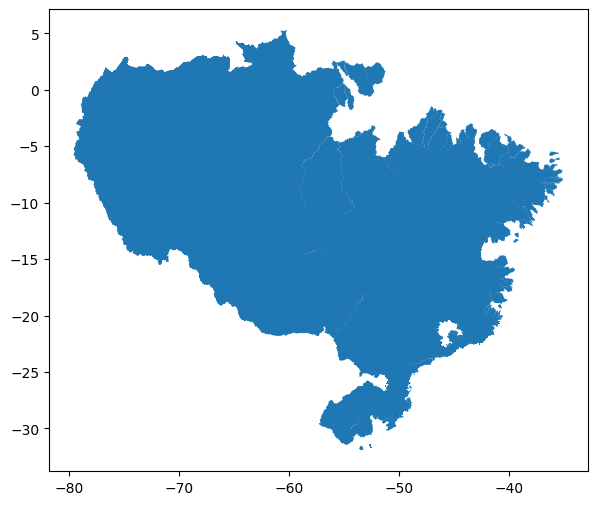

In [9]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
shp_CABra.plot(ax=ax)
plt.show()

In [10]:
# Encontrando a linha do dataframe que tem o ID_CABra == 1
shp_CABra[shp_CABra['ID_CABra']==1]

area_CABra   gauge_ANA  ID_CABra  X_outlet  Y_outlet  \
352  243410.278886  13880000.0       1.0   -64.384    -6.541   

                                              geometry  
352  MULTIPOLYGON (((-68.44875 -7.14875, -68.44708 ...

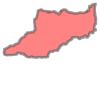

In [11]:
shp_CABra.loc[352,'geometry']

In [12]:
shp_CABra.loc[352]

area_CABra                                        243410.278886
gauge_ANA                                            13880000.0
ID_CABra                                                    1.0
X_outlet                                                -64.384
Y_outlet                                                 -6.541
geometry      MULTIPOLYGON (((-68.4487499994223 -7.148749999...
Name: 352, dtype: object

In [13]:
#get shape from watershed 352
shape_352 = shp_CABra.loc[shp_CABra['ID_CABra']==1]

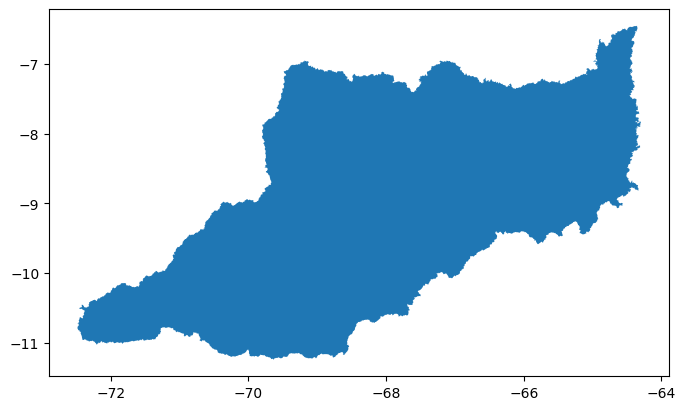

In [14]:
# Plot all the catchments
fig, ax = plt.subplots(figsize=(8,6))
shape_352.plot(ax=ax)
plt.show()

Do mapa acima podemos ver que os limites são:

* latitude: -6 a -12 graus
* longitude -64 a -72 graus

In [15]:
shape_352.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# Adicionar um base map no fundo
df_wm = shape_352.to_crs(epsg=3857)

<Axes: >

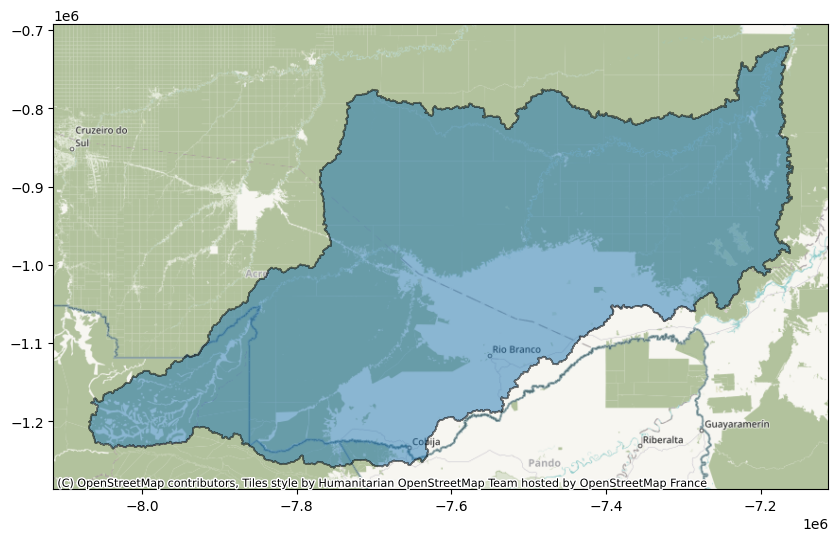

In [17]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)
shape_352.plot(ax=ax)
#plt.show()

## Obtendo o modelo digital do terreno


1. Acessar o site: https://portal.opentopography.org/ (se registrar no site antes), procurar SRTM e acessar SRTM15+
2. Encontrar as coordenadas geográficas de uma **região maior** do que a bacia de interesse.  Otimizar processo por tentativa e erro.
3. Fazer o download do Raster SRTM15+
4. Adicionar o Raster no seu Google Drive e Compartilhar. Usar opção: `Qualquer pessoa com o link`
5. Obter o link e copiar o códido dentro do endereço do link, por exemplo:

Link:
https://drive.google.com/file/d/1d8Abmy_g2s4_Sn-mrfiRrI5xRY_jSN3K/view?usp=sharing

Parte interna: 1d8Abmy_g2s4_Sn-mrfiRrI5xRY_jSN3K

In [18]:
# download a file from a google drive link
#!gdown '1d8Abmy_g2s4_Sn-mrfiRrI5xRY_jSN3K' --output output_SRTM15Plus_ponta_grossa.tif

!gdown '1Sl6bKLh4_hn9k6sv8qrr3VDl8I3_Adz0' --output output_SRTM15Plus_rio_branco.tif

Downloading...
From: https://drive.google.com/uc?id=1Sl6bKLh4_hn9k6sv8qrr3VDl8I3_Adz0
To: /content/output_SRTM15Plus_rio_branco.tif
100% 3.27M/3.27M [00:00<00:00, 60.6MB/s]


In [19]:
# rename a file in google colab
!mv output_SRTM15Plus_rio_branco.tif raster_SRTM.tif

# Instatiate a grid from a DEM raster

In [20]:
grid = Grid.from_raster('raster_SRTM.tif')
dem = grid.read_raster('raster_SRTM.tif')

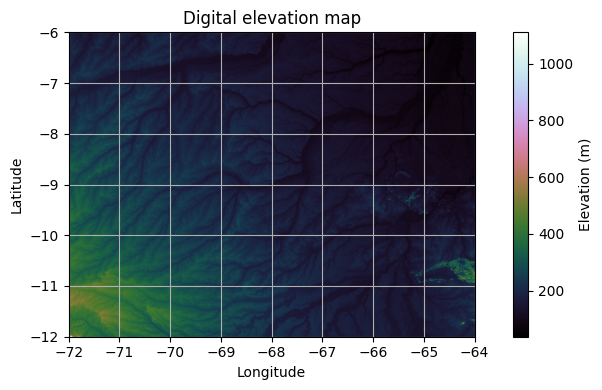

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='cubehelix', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('img/conditioned_dem.png', bbox_inches='tight')

# Resolve flats in DEM

In [22]:
# Condition DEM
# ----------------------
# Fill pits in DEM
pit_filled_dem = grid.fill_pits(dem)

# Fill depressions in DEM
flooded_dem = grid.fill_depressions(pit_filled_dem)

# Resolve flats in DEM
inflated_dem = grid.resolve_flats(flooded_dem)

# Specify flow direction values

In [23]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

# Convert DEM to flow direction grid

In [24]:
fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

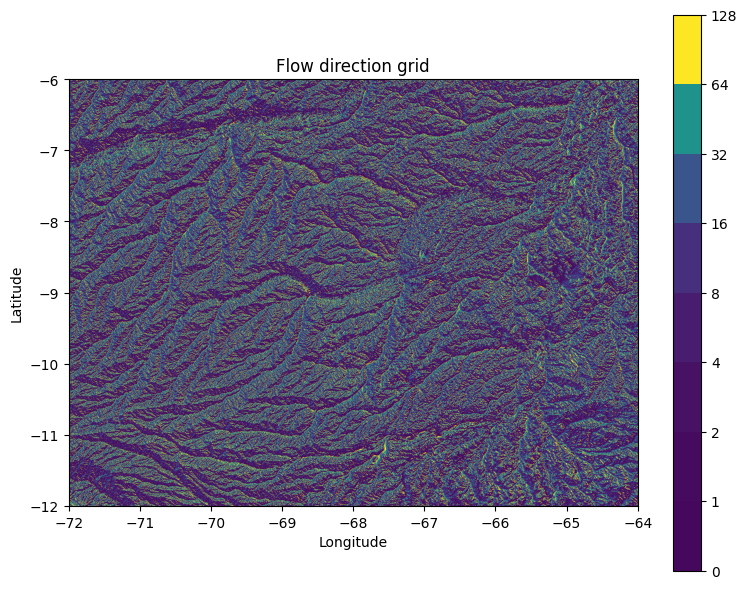

In [25]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(fdir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid')
plt.grid(zorder=-1)
plt.tight_layout()
plt.savefig('img/flow_direction.png', bbox_inches='tight')

In [26]:
# Calculate flow accumulation
# --------------------------
acc = grid.accumulation(fdir, dirmap=dirmap)

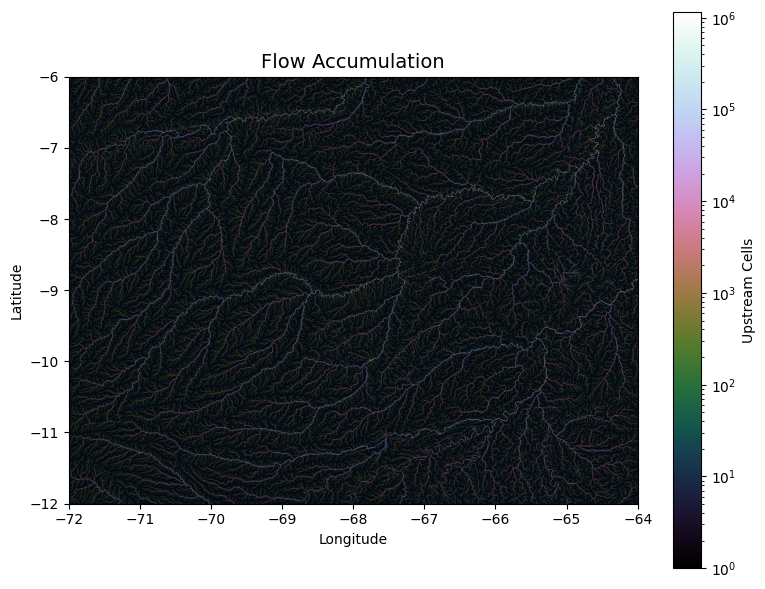

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Encontrar as coordenadas geográficas do posto pluviométrico

Onde encontrar?
* Site da Agência Nacional de Águas (ANA)
* Agências estaduais do meio ambiente
* Plano de Bacia
* **CABra dataset** - Catchments Attributes for Brazil (CABra)

# Delineate catchment

In [28]:
# Specify pour point
x, y = -64.384, -6.541  # graus (CABra)
# Outros locais para encontrar as coordenadas ANA, Planos de Bacias (postos fluviometricos)

# Snap pour point to high accumulation cell
x_snap, y_snap = grid.snap_to_mask(acc > 1000, (x, y))

# Delineate the catchment
catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap,
                       xytype='coordinate')

# Crop and plot the catchment
# ---------------------------
# Clip the bounding box to the catchment
grid.clip_to(catch)
clipped_catch = grid.view(catch)

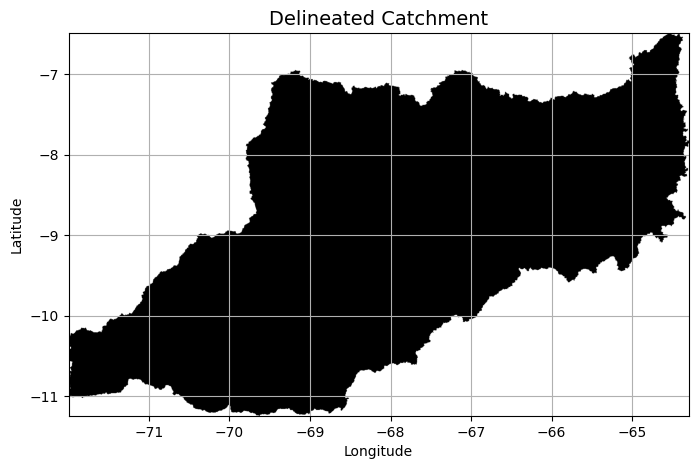

In [29]:
# Plot the catchment
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.grid('on', zorder=0)
im = ax.imshow(np.where(clipped_catch, clipped_catch, np.nan), extent=grid.extent,
               zorder=1, cmap='Greys_r')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delineated Catchment', size=14)
plt.savefig('img/catchment.png', bbox_inches='tight')

In [30]:
#clipped_catch

# Create vector representation of catchment mask


In [31]:
# The polygonize argument defaults to the grid mask when no arguments are supplied
shapes = grid.polygonize()

In [32]:
shapes

<generator object shapes at 0x7de05ca471f0>

# Write to shapefile

In [33]:
shapes = grid.polygonize()

# Ensure the directory exists and is clean for a fresh write
!rm -rf shapefiles
!mkdir shapefiles

schema = {
    'geometry': 'Polygon',
    'properties': {'LABEL': 'float:16'}
}

num_shapes_written = 0
with fiona.open('shapefiles/catchment.shp', 'w',
                driver='ESRI Shapefile',
                crs=grid.crs.srs,
                schema=schema) as c:
    i = 0
    for shape, value in shapes:
        rec = {}
        rec['geometry'] = shape
        rec['properties'] = {'LABEL' : str(value)}
        rec['id'] = str(i)
        c.write(rec)
        i += 1
        num_shapes_written += 1

print(f"Successfully wrote {num_shapes_written} polygon(s) to shapefiles/catchment.shp")

Successfully wrote 2 polygon(s) to shapefiles/catchment.shp


In [34]:
shp = gpd.read_file('shapefiles/catchment.shp')

In [35]:
shp

LABEL                                           geometry
0      1  POLYGON ((-64.35833 -7.55417, -64.35417 -7.554...
1      1  POLYGON ((-64.54167 -6.49167, -64.53333 -6.491...

Text(0.5, 1.0, 'Catchment polygon')

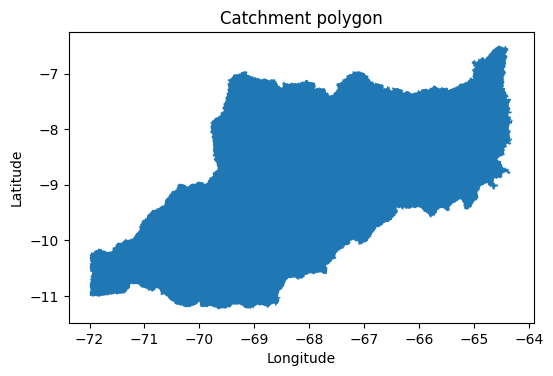

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
shp.plot(ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Catchment polygon')

## Alteração Projeção (Coord. Geo -> UTM)

Para alterar a projeção vamos precisar saber qual código EPSG temos na nossa zona UTM.


| DATUM | CóDIGO EPSG |
| :--- | :--- |
| WGS 1984 / UTM zone 18N | 32618 |
| WGS 1984 / UTM zone 18S | 32718 |
| WGS 1984 / UTM zone 19N | 32619 |
| WGS 1984 / UTM zone 19S | 32719 |
| WGS 1984 / UTM zone 20N | 32620 |
| WGS 1984 / UTM zone 20S | 32720 |
| WGS 1984 / UTM zone 21N | 32621 |
| WGS 1984 / UTM zone 21S | 32721 |
| WGS 1984 / UTM zone 22N | 32622 |
| WGS 1984 / UTM zone 22S | 32722 |
| WGS 1984 / UTM zone 23S | 32723 |
| WGS 1984 / UTM zone 24S | 32724 |
| WGS 1984 / UTM zone 25S | 32725 |

In [37]:
# insert image in a text cell from link in dropbox
from IPython.display import Image
Image(url="https://www.dropbox.com/scl/fi/8nsn6fme813szdpcghqow/Fusos-e-hemisferios-da-projecao-UTM-para-o-Brasil.jpg?rlkey=d7nydohmna1lh5qlm5vebrujj&dl=1", width=400)


In [38]:
shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
#shp2 = shp.to_crs({'init':'epsg:32722'})
shp2 = shp.to_crs({'init':'epsg:32719'})


In [40]:
shp2.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Calculate the Area

In [41]:
shp2

LABEL                                           geometry
0      1  POLYGON ((1012593.434 9162255.085, 1013054.553...
1      1  POLYGON ((993429.83 9280271.268, 994353.964 92...

Text(0.5, 1.0, 'Catchment polygon')

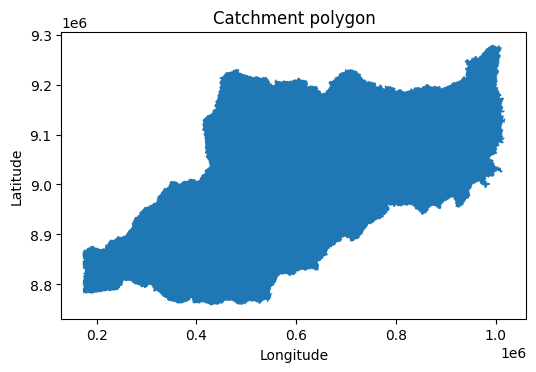

In [42]:
fig, ax = plt.subplots(figsize=(6,6))
shp2.plot(ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Catchment polygon')

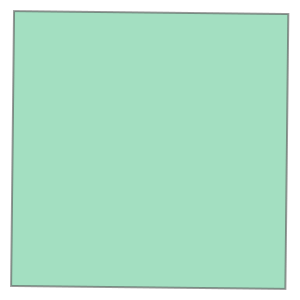

In [43]:
shp2.loc[0,'geometry']

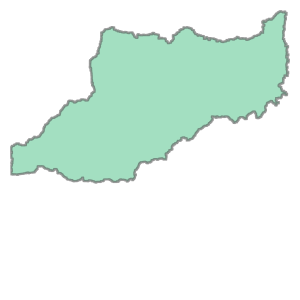

In [44]:
shp2.loc[1,'geometry']

In [45]:
from shapely.geometry import shape

In [46]:
shape(shp2.loc[1,'geometry']).area

233066782633.81592

### Conferir Área com documentos oficiais

Área = 233066782633.81 m$^2$

Conferir na plataforma da ANA e comitês de bacias

In [47]:
for i in range(len(shp2)):
  shp2.loc[i,'area_m2'] = shape(shp2.loc[i,'geometry']).area

In [48]:
shp2

LABEL                                           geometry       area_m2
0      1  POLYGON ((1012593.434 9162255.085, 1013054.553...  2.131048e+05
1      1  POLYGON ((993429.83 9280271.268, 994353.964 92...  2.330668e+11

In [49]:
shp2['area_km2'] = shp2['area_m2']/1000000

In [50]:
shp2

LABEL                                           geometry       area_m2  \
0      1  POLYGON ((1012593.434 9162255.085, 1013054.553...  2.131048e+05   
1      1  POLYGON ((993429.83 9280271.268, 994353.964 92...  2.330668e+11   

        area_km2  
0       0.213105  
1  233066.782634

# Comprimir (Zipar) e fazer o download do arquivo

In [51]:
!zip -r /content/shapefile.zip /content/shapefiles

  adding: content/shapefiles/ (stored 0%)
  adding: content/shapefiles/catchment.dbf (deflated 65%)
  adding: content/shapefiles/catchment.shx (deflated 51%)
  adding: content/shapefiles/catchment.prj (deflated 17%)
  adding: content/shapefiles/catchment.cpg (stored 0%)
  adding: content/shapefiles/catchment.shp (deflated 82%)


In [52]:
from google.colab import files
files.download("/content/shapefile.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>